In [1]:
# default_exp mrna_content

# mRNA content regression

> API details.

In [2]:
#hide
from nbdev.showdoc import *

In [27]:
# %load common.py
# export

import pandas
import os
import numpy
import seaborn
import logging
import matplotlib.pyplot as plt
from importlib import reload

numpy.random.seed(42)

In [30]:
# export

import fcsparser
import sklearn.linear_model
import sklearn.model_selection

In [5]:
meta, df = fcsparser.parse("D:/Experiment_data/weizmann/EhV/201/aggregates/non_intensity_T04567_R123.fcs")
df_meta = df[["label", "replicate", "timepoint"]].astype(int)
df_meta["timepoint"] = df_meta["timepoint"].map(lambda a: meta["timepoint"].split(",")[a])
df_meta["replicate"] = df_meta["replicate"].map(lambda a: meta["replicate"].split(",")[a])
df = df.drop(columns=["label", "replicate", "timepoint"])

# mRNA content targets

In [8]:
_, fluor_df = fcsparser.parse("D:/Experiment_data/weizmann/EhV/201/aggregates/fluor_T04567_R123.fcs")

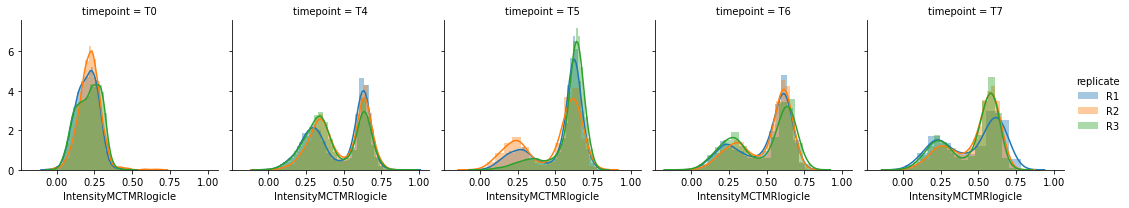

In [15]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([fluor_df, df_meta], axis=1))
grid.map(seaborn.distplot, "IntensityMCTMRlogicle")
grid.add_legend()

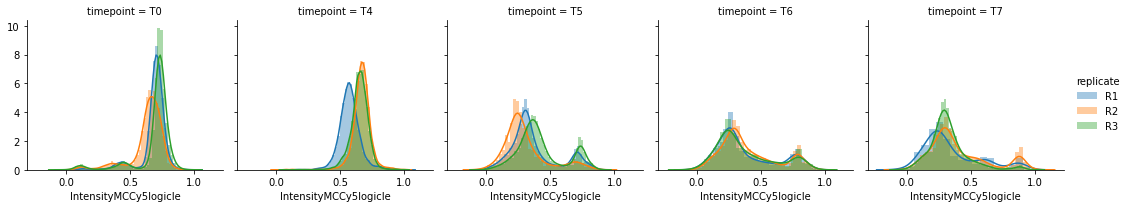

In [16]:
grid = seaborn.FacetGrid(col="timepoint", hue="replicate", data=pandas.concat([fluor_df, df_meta], axis=1))
grid.map(seaborn.distplot, "IntensityMCCy5logicle")
grid.add_legend()

# BF regression on targets

In [17]:
df_bf = df.filter(regex="(i?).*BF.*")

In [32]:
regressor = sklearn.linear_model.Lasso()
scores = sklearn.model_selection.cross_validate(regressor, df_bf, fluor_df["IntensityMCTMR"], return_train_score=True, verbose=4, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.7s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished


In [33]:
scores

{'fit_time': array([4.18180346, 4.19743109, 4.24430704, 4.11934781, 4.05682254]),
 'score_time': array([0.        , 0.        , 0.        , 0.01562095, 0.01565909]),
 'test_score': array([-4.39539388e+00,  3.33926194e-01,  2.97734346e-01,  1.15917101e-01,
        -2.30478184e-04]),
 'train_score': array([0.29006832, 0.34188788, 0.35391365, 0.33821398, 0.39961472])}